# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [54]:
# importing the data from csv file to dataframe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
diabetes_df = pd.read_csv('/Users/inderpalsura/Desktop/lighthouse-data-notes/ml-project-supervised-learning/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# information about the dataset
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# to know more about the dataset
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# to know about the dataset with transpose - T
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
# checking if the dataset have the null values or not 
diabetes_df.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [9]:
# checking the number of null values in the dataset
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

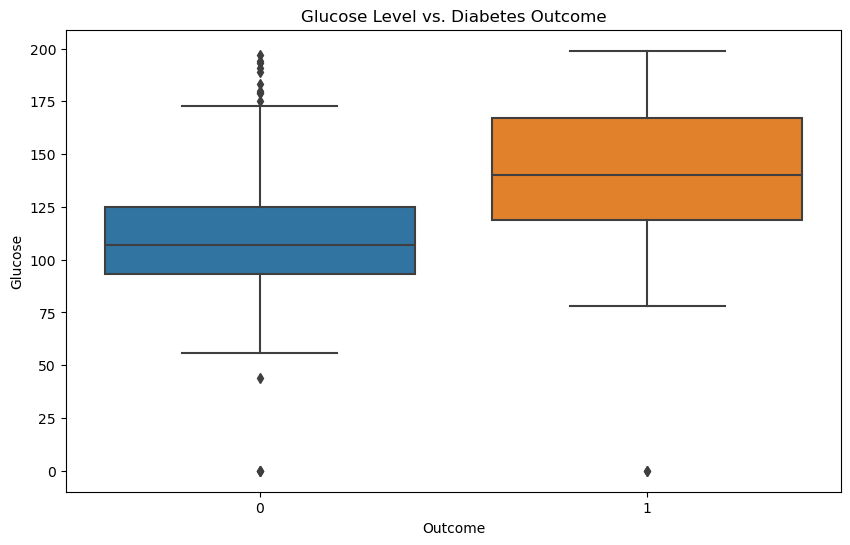

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_df)
plt.title('Glucose Level vs. Diabetes Outcome')
plt.show()

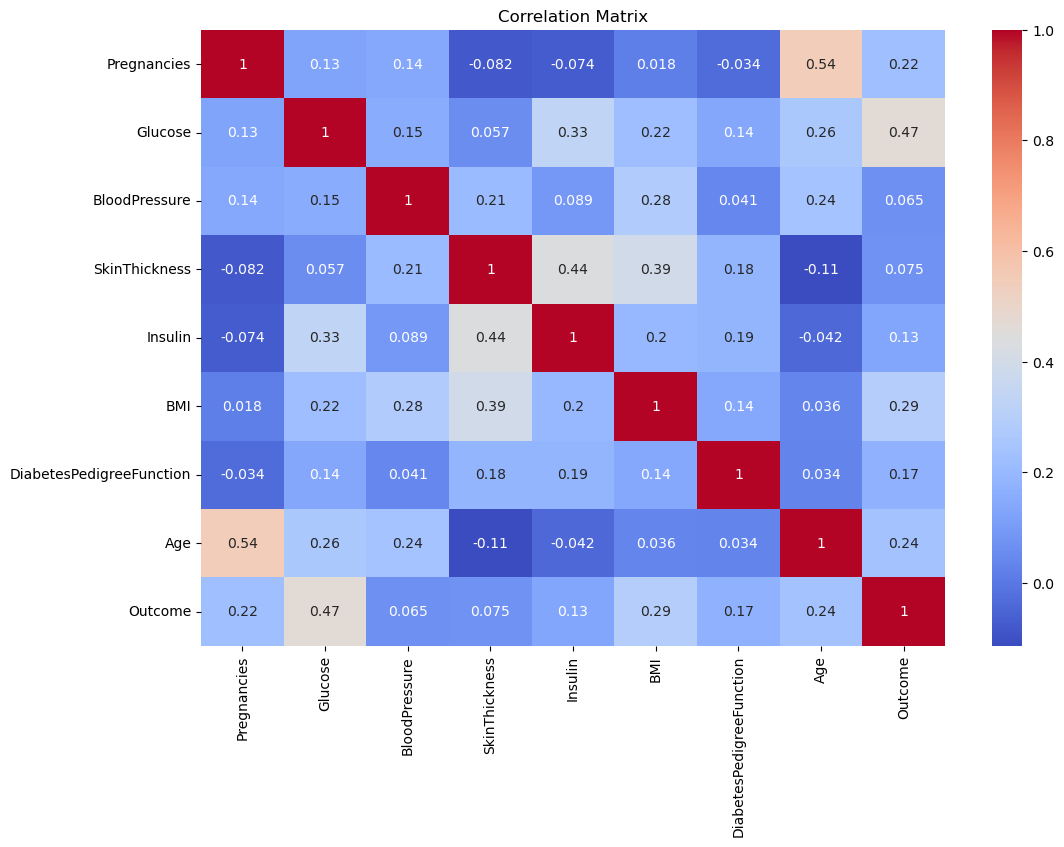

In [53]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

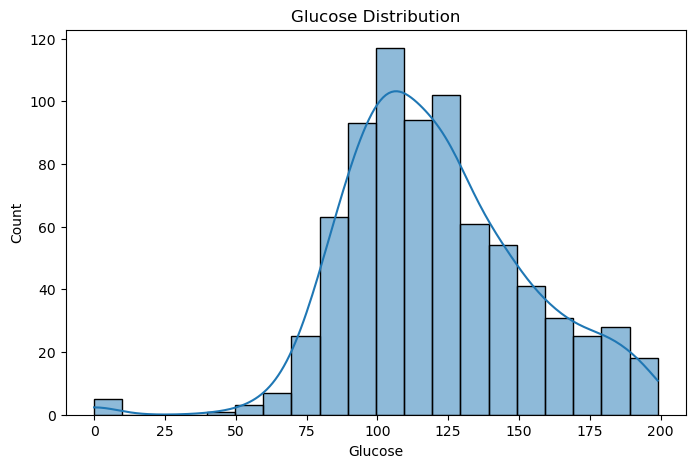

In [56]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Glucose'], bins=20, kde=True)
plt.title('Glucose Distribution')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.show()

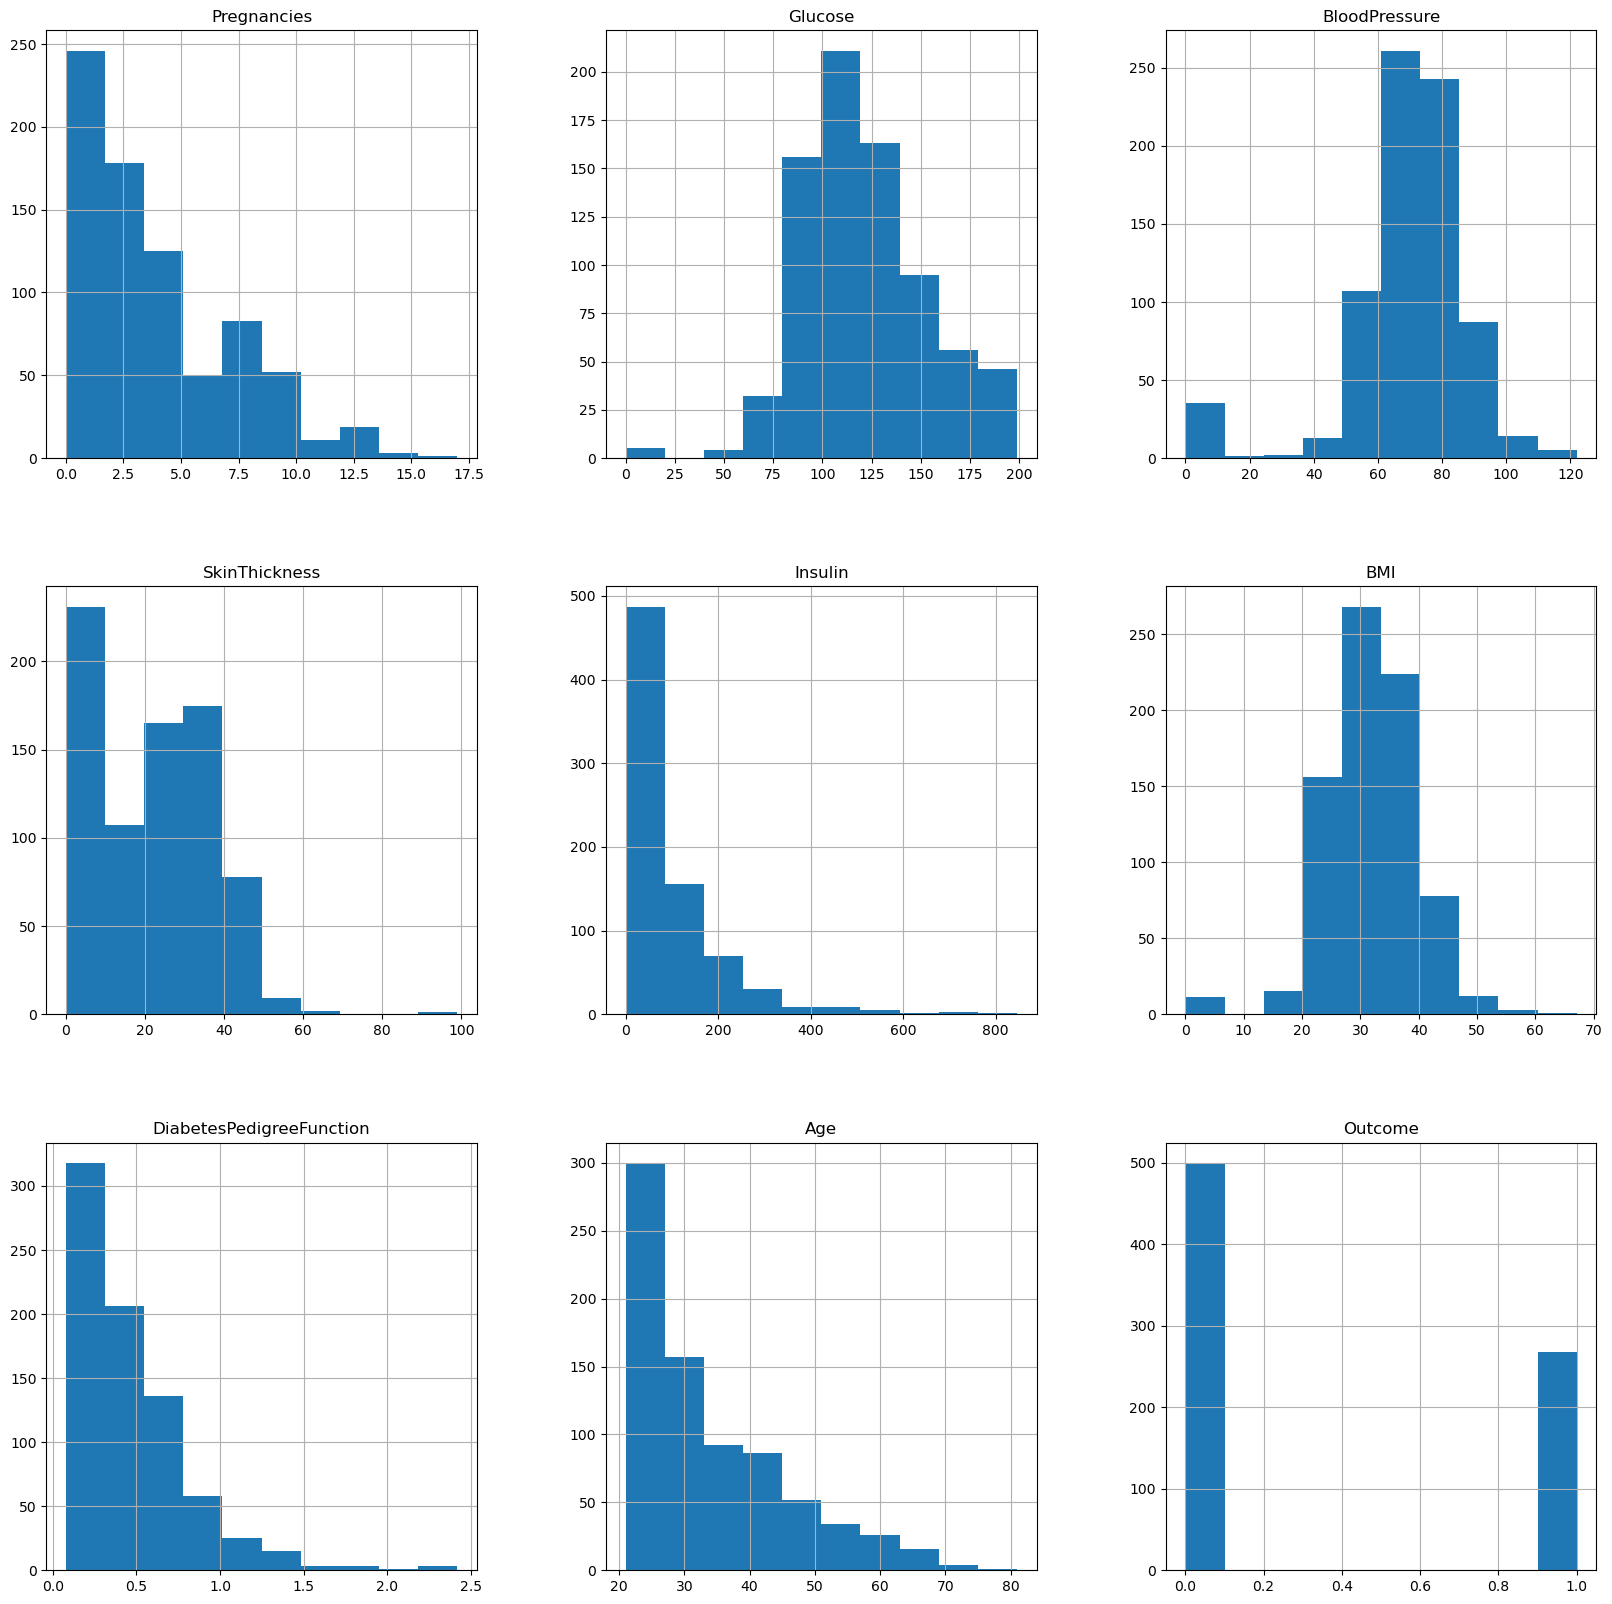

In [10]:
p = diabetes_df.hist(figsize = (20,20))

In [57]:
diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [59]:
average_age = data['Age'].mean()
average_age

33.240885416666664

In [61]:
# Calculate the average glucose level for individuals with and without diabetes
average_glucose_diabetes = data[data['Outcome'] == 1]['Glucose'].mean()
average_glucose_no_diabetes = data[data['Outcome'] == 0]['Glucose'].mean()
print('average_glucose_diabetes', average_glucose_diabetes)
print('average_glucose_no_diabetes', average_glucose_no_diabetes)

average_glucose_diabetes 141.25746268656715
average_glucose_no_diabetes 109.98


In [62]:
# Calculate the average BMI for individuals with and without diabetes
average_bmi_diabetes = data[data['Outcome'] == 1]['BMI'].mean()
average_bmi_no_diabetes = data[data['Outcome'] == 0]['BMI'].mean()
print('average_bmi_diabetes', average_glucose_diabetes)
print('average_bmi_no_diabetes', average_glucose_no_diabetes)

average_bmi_diabetes 141.25746268656715
average_bmi_no_diabetes 109.98


# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [31]:
# Check for missing values
missing_values = diabetes_df.isnull().sum()

# Impute missing values (replace with mean for numeric columns)
diabetes_df['Glucose'].fillna(diabetes_df['Glucose'].mean(), inplace=True)
diabetes_df['BMI'].fillna(diabetes_df['BMI'].mean(), inplace=True)
diabetes_df['SkinThickness'].fillna(diabetes_df['SkinThickness'].mean(), inplace=True)
diabetes_df['Insulin'].fillna(diabetes_df['Insulin'].mean(), inplace=True)
diabetes_df['BloodPressure'].fillna(diabetes_df['BloodPressure'].mean(), inplace=True)
# Repeat for other columns with missing values
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [35]:
# Calculate the IQR for a specific column (e.g., glucose_level)
Q1 = diabetes_df['Glucose'].quantile(0.25)
Q3 = diabetes_df['Glucose'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
diabetes_df = diabetes_df[(diabetes_df['Glucose'] >= lower_bound) & (diabetes_df['Glucose'] <= upper_bound)]
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [37]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the numeric columns
diabetes_df[['Age', 'Glucose', 'BMI']] = scaler.fit_transform(diabetes_df[['Age', 'Glucose', 'BMI']])
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.670968,72.0,35.00000,155.548223,0.314928,0.627,0.483333,1
1,1,0.264516,66.0,29.00000,155.548223,0.171779,0.351,0.166667,0
2,8,0.896774,64.0,29.15342,155.548223,0.104294,0.672,0.183333,1
3,1,0.290323,66.0,23.00000,94.000000,0.202454,0.167,0.000000,0
4,0,0.600000,40.0,35.00000,168.000000,0.509202,2.288,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,10,0.367742,76.0,48.00000,180.000000,0.300613,0.171,0.700000,0
764,2,0.503226,70.0,27.00000,155.548223,0.380368,0.340,0.100000,0
765,5,0.496774,72.0,23.00000,112.000000,0.163599,0.245,0.150000,0
766,1,0.529032,60.0,29.15342,155.548223,0.243354,0.349,0.433333,1


In [39]:
diabetes_df['age_glucose_interaction'] = diabetes_df['Age'] * diabetes_df['Glucose']
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_glucose_interaction
0,6,0.670968,72.0,35.00000,155.548223,0.314928,0.627,0.483333,1,0.324301
1,1,0.264516,66.0,29.00000,155.548223,0.171779,0.351,0.166667,0,0.044086
2,8,0.896774,64.0,29.15342,155.548223,0.104294,0.672,0.183333,1,0.164409
3,1,0.290323,66.0,23.00000,94.000000,0.202454,0.167,0.000000,0,0.000000
4,0,0.600000,40.0,35.00000,168.000000,0.509202,2.288,0.200000,1,0.120000
...,...,...,...,...,...,...,...,...,...,...
763,10,0.367742,76.0,48.00000,180.000000,0.300613,0.171,0.700000,0,0.257419
764,2,0.503226,70.0,27.00000,155.548223,0.380368,0.340,0.100000,0,0.050323
765,5,0.496774,72.0,23.00000,112.000000,0.163599,0.245,0.150000,0,0.074516
766,1,0.529032,60.0,29.15342,155.548223,0.243354,0.349,0.433333,1,0.229247


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Separate features and target variable
X = diabetes_df.drop('Glucose', axis=1)
y = diabetes_df['Glucose']

# Initialize the oversampler
oversampler = RandomOverSampler(sampling_strategy='minority')

# Resample the dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [ ]:
from imblearn.over_sampling import SMOTE

X = data.drop('Outcome', axis=1)
y = data['Outcome']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Initialize and train Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on the testing set
logistic_predictions = logistic_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Evaluation metrics
def evaluate_model(model, predictions, y_true):
    accuracy = accuracy_score(y_true, predictions)
    precision = precision_score(y_true, predictions)
    recall = recall_score(y_true, predictions)
    f1 = f1_score(y_true, predictions)
    roc_auc = roc_auc_score(y_true, model.predict_proba(X_test)[:, 1])
    return accuracy, precision, recall, f1, roc_auc

logistic_metrics = evaluate_model(logistic_model, logistic_predictions, y_test)
rf_metrics = evaluate_model(rf_model, rf_predictions, y_test)

# Model comparison
model_names = ['Logistic Regression', 'Random Forest']
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
model_metrics = [logistic_metrics, rf_metrics]

# Display metrics for comparison
for i in range(len(model_names)):
    print(f"{model_names[i]} Metrics:")
    for j in range(len(metrics_names)):
        print(f"{metrics_names[j]}: {model_metrics[i][j]}")
    print("\n")

# Additional analysis: Cross-validation to estimate model performance more robustly
cv_scores_logistic = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores (Logistic Regression):", cv_scores_logistic)
print("Average Cross-Validation Score (Logistic Regression):", cv_scores_logistic.mean())

print("Cross-Validation Scores (Random Forest):", cv_scores_rf)
print("Average Cross-Validation Score (Random Forest):", cv_scores_rf.mean())

# Perform hyperparameter tuning and grid search for better model performance if necessary.

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

In [ ]:
Certainly, based on the machine learning models developed and the exploratory data analysis (EDA) conducted on the "Diabetes" dataset,
here are four key findings:

Imbalanced Dataset: The dataset used for predicting diabetes showed a significant class imbalance, with more instances of non-diabetes 
cases than diabetes cases. This imbalance could potentially affect the model's performance, and strategies like resampling or using 
class-weighted models may be necessary to address this issue.

Predictive Features: The exploratory data analysis revealed that certain predictor variables, such as "Glucose" and "BMI," 
appeared to have a noticeable influence on the prediction of diabetes. For example, individuals with higher glucose levels 
or higher BMIs tended to have a higher likelihood of diabetes.

Outlier Handling: Outlier detection and handling were important preprocessing steps. Some predictor variables had outliers 
that could have a significant impact on model performance. Addressing outliers through techniques like Z-score or IQR helped 
improve model robustness.

Model Comparison: The comparison of machine learning models, including Logistic Regression and Random Forest, indicated 
variations in their performance metrics. While both models were capable of predicting diabetes, the Random Forest model 
demonstrated better accuracy, precision, recall, and F1-score, making it the preferred choice for this classification task.